In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.wrappers.scikit_learn import KerasClassifier

**DATA EXPLORER**

In [46]:
df = pd.read_csv("c:/Users/maria/Downloads/NASA 1 year.csv")
df

,Timestamp,Time,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max
0,1/1/2023,0:00:00,1,4.92,4.53,5.82,-3.57,-4.75,1.81,1.62,...,43.43,11.96,10.26,15.51,557.0,545.0,605.2,542991,453029,754507
1,1/1/2023,6:00:00,1,4.82,4.56,5.16,-3.48,-4.85,1.17,1.69,...,56.06,11.09,9.85,12.38,548.3,519.3,576.7,464296,320332,616560
2,1/1/2023,12:00:00,1,4.71,4.21,5.15,-2.64,-4.65,2.49,3.06,...,29.51,9.99,9.48,12.29,532.7,512.3,562.4,322532,300925,516750
3,1/1/2023,18:00:00,1,4.84,3.49,5.41,-1.10,-4.68,2.61,2.46,...,38.02,9.44,7.50,11.71,527.2,489.4,542.0,314963,221218,477518
4,1/2/2023,0:00:00,1,4.48,3.97,5.21,-2.50,-4.13,2.68,2.67,...,56.88,8.96,7.03,11.28,508.1,486.7,536.1,293298,199120,473128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,10/3/2023,18:00:00,1,7.72,6.74,8.60,-6.30,-7.66,-3.91,4.18,...,19.17,4.13,1.68,6.16,393.8,313.6,469.3,117001,10151,212203
1104,10/4/2023,0:00:00,1,8.46,7.42,9.51,-5.74,-8.15,-0.40,6.02,...,17.68,2.27,0.74,4.78,392.8,326.0,437.3,121404,5000,225067
1105,10/4/2023,6:00:00,1,8.00,5.81,8.57,-4.35,-6.35,-0.20,5.08,...,22.81,3.05,1.81,6.98,404.0,374.0,477.1,169333,84621,500209
1106,10/4/2023,12:00:00,1,7.02,6.13,7.89,-1.32,-4.28,3.32,6.39,...,27.03,2.91,1.07,6.55,410.6,389.5,475.3,145439,63981,462712


In [99]:
df_kp = pd.read_csv('c:/Users/maria/Downloads/K-index data.csv')
df_kp

,Timestamp,Time,Unnamed: 2,Unnamed: 3,Unnamed: 4,Kp,Ap,Unnamed: 7
0,2023 01 01,0,1.5,33238.000,33238.0625,2.333,9,1
1,2023 01 01,3,4.5,33238.125,33238.1875,3.000,15,1
2,2023 01 01,6,7.5,33238.250,33238.3125,2.000,7,1
3,2023 01 01,9,10.5,33238.375,33238.4375,2.667,12,1
4,2023 01 01,12,13.5,33238.500,33238.5625,1.667,6,1
...,...,...,...,...,...,...,...,...
2210,2023 10 04,6,7.5,33514.250,33514.3125,2.333,9,0
2211,2023 10 04,9,10.5,33514.375,33514.4375,2.000,7,0
2212,2023 10 04,12,13.5,33514.500,33514.5625,1.667,6,0
2213,2023 10 04,15,16.5,33514.625,33514.6875,1.333,5,0


In [100]:
print(df.shape)
print(df_kp.shape)

(1108, 32)
(2215, 8)


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  1108 non-null   object 
 1   Time       1108 non-null   object 
 2   Source     1108 non-null   int64  
 3   Bt-med     1108 non-null   float64
 4   Bt-min     1108 non-null   float64
 5   Bt-max     1108 non-null   float64
 6   Bx-med     1108 non-null   float64
 7   Bx-min     1108 non-null   float64
 8   Bx-max     1108 non-null   float64
 9   By-med     1108 non-null   float64
 10  By-min     1108 non-null   float64
 11  By-max     1108 non-null   float64
 12  Bz-med     1108 non-null   float64
 13  Bz-min     1108 non-null   float64
 14  Bz-max     1108 non-null   float64
 15  Phi-mean   1108 non-null   float64
 16  Phi-min    1108 non-null   float64
 17  Phi-max    1108 non-null   float64
 18  Theta-med  1108 non-null   float64
 19  Theta-min  1108 non-null   float64
 20  Theta-ma

In [50]:
df_kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   2215 non-null   object 
 1   Time        2215 non-null   int64  
 2   Unnamed: 2  2215 non-null   float64
 3   Unnamed: 3  2215 non-null   float64
 4   Unnamed: 4  2215 non-null   float64
 5   Kp          2215 non-null   float64
 6   Ap          2215 non-null   int64  
 7   Unnamed: 7  2215 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 138.6+ KB


**DATA CLEANING AND PREPARATION**

In [101]:
df_kp.drop(['Unnamed: 2'],axis=1,inplace=True)
df_kp.drop(['Unnamed: 3'],axis=1,inplace=True)
df_kp.drop(['Unnamed: 4'],axis=1,inplace=True)
df_kp.drop(['Unnamed: 7'],axis=1,inplace=True)
df_kp

,Timestamp,Time,Kp,Ap
0,2023 01 01,0,2.333,9
1,2023 01 01,3,3.000,15
2,2023 01 01,6,2.000,7
3,2023 01 01,9,2.667,12
4,2023 01 01,12,1.667,6
...,...,...,...,...
2210,2023 10 04,6,2.333,9
2211,2023 10 04,9,2.000,7
2212,2023 10 04,12,1.667,6
2213,2023 10 04,15,1.333,5


In [102]:
df.isnull().sum()

Timestamp      0
Time           0
Source         0
Bt-med         0
Bt-min         0
Bt-max         0
Bx-med         0
Bx-min         0
Bx-max         0
By-med         0
By-min         0
By-max         0
Bz-med         0
Bz-min         0
Bz-max         0
Phi-mean       0
Phi-min        0
Phi-max        0
Theta-med      0
Theta-min      0
Theta-max      0
Dens-med       0
Dens-min       0
Dens-max       0
Speed-med      0
Speed-min      0
Speed-max      0
Temp-med       0
Temp-min       0
Temp-max       0
Kp           554
Ap           554
dtype: int64

In [103]:
df_kp.isnull().sum()

Timestamp    0
Time         0
Kp           0
Ap           0
dtype: int64

In [104]:
df_kp.reset_index(inplace=True)


In [105]:
df_kp

,index,Timestamp,Time,Kp,Ap
0,0,2023 01 01,0,2.333,9
1,1,2023 01 01,3,3.000,15
2,2,2023 01 01,6,2.000,7
3,3,2023 01 01,9,2.667,12
4,4,2023 01 01,12,1.667,6
...,...,...,...,...,...
2210,2210,2023 10 04,6,2.333,9
2211,2211,2023 10 04,9,2.000,7
2212,2212,2023 10 04,12,1.667,6
2213,2213,2023 10 04,15,1.333,5


In [106]:
indexKP = df_kp[ (df_kp["index"] % 2 != 0)].index
df_kp.drop(indexKP , inplace=True)
df_kp

,index,Timestamp,Time,Kp,Ap
0,0,2023 01 01,0,2.333,9
2,2,2023 01 01,6,2.000,7
4,4,2023 01 01,12,1.667,6
6,6,2023 01 01,18,3.667,22
8,8,2023 01 02,0,2.000,7
...,...,...,...,...,...
2206,2206,2023 10 03,18,2.000,7
2208,2208,2023 10 04,0,3.000,15
2210,2210,2023 10 04,6,2.333,9
2212,2212,2023 10 04,12,1.667,6


In [107]:
df_kp.duplicated()

0       False
2       False
4       False
6       False
8       False
        ...  
2206    False
2208    False
2210    False
2212    False
2214    False
Length: 1108, dtype: bool

In [108]:
data = df
data[['Ap','Kp']] = df_kp[['Ap','Kp']]
data.head()

,Timestamp,Time,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,Kp,Ap
0,1/1/2023,0:00:00,1,4.92,4.53,5.82,-3.57,-4.75,1.81,1.62,...,10.26,15.51,557.0,545.0,605.2,542991,453029,754507,2.333,9.0
1,1/1/2023,6:00:00,1,4.82,4.56,5.16,-3.48,-4.85,1.17,1.69,...,9.85,12.38,548.3,519.3,576.7,464296,320332,616560,NaN,NaN
2,1/1/2023,12:00:00,1,4.71,4.21,5.15,-2.64,-4.65,2.49,3.06,...,9.48,12.29,532.7,512.3,562.4,322532,300925,516750,2.000,7.0
3,1/1/2023,18:00:00,1,4.84,3.49,5.41,-1.10,-4.68,2.61,2.46,...,7.50,11.71,527.2,489.4,542.0,314963,221218,477518,NaN,NaN
4,1/2/2023,0:00:00,1,4.48,3.97,5.21,-2.50,-4.13,2.68,2.67,...,7.03,11.28,508.1,486.7,536.1,293298,199120,473128,1.667,6.0


In [109]:
data['Kp']=data['Kp'].fillna(data['Kp'].mean())
data['Ap']=data['Ap'].fillna(data['Ap'].median())
data.isnull().sum()

Timestamp    0
Time         0
Source       0
Bt-med       0
Bt-min       0
Bt-max       0
Bx-med       0
Bx-min       0
Bx-max       0
By-med       0
By-min       0
By-max       0
Bz-med       0
Bz-min       0
Bz-max       0
Phi-mean     0
Phi-min      0
Phi-max      0
Theta-med    0
Theta-min    0
Theta-max    0
Dens-med     0
Dens-min     0
Dens-max     0
Speed-med    0
Speed-min    0
Speed-max    0
Temp-med     0
Temp-min     0
Temp-max     0
Kp           0
Ap           0
dtype: int64

**DATA ANALYSIS**

In [110]:
data.describe()

,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,By-max,...,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,Kp,Ap
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,...,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1.108000e+03,1108.000000,1.108000e+03,1108.000000,1108.000000
mean,0.998195,-173.829350,-175.541977,-172.457879,-180.260866,-184.039675,-176.684233,-180.786173,-184.882987,-176.389305,...,-176.856733,-169.576796,265.974278,235.027076,300.955054,1.622780e+05,69297.582130,3.380935e+05,2.124540,9.605596
std,0.060084,4246.916048,4246.842839,4246.975038,4246.642889,4246.481880,4246.794863,4246.621208,4246.446584,4246.807973,...,4246.787163,4247.101295,4266.182906,4264.792553,4267.743731,1.496670e+05,78414.146887,2.668830e+05,0.936272,13.203933
min,-1.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,...,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-9.999900e+04,-99999.000000,-9.999900e+04,0.000000,0.000000
25%,1.000000,4.980000,3.645000,5.780000,-2.805000,-5.682500,1.840000,-3.180000,-6.212500,1.707500,...,1.130000,6.550000,400.000000,375.800000,429.925000,5.826825e+04,11251.750000,1.545115e+05,2.000000,7.000000
50%,1.000000,5.940000,4.690000,6.995000,0.740000,-3.755000,4.160000,-0.910000,-4.470000,4.165000,...,3.220000,9.610000,446.600000,415.800000,480.000000,1.206725e+05,46096.000000,2.770000e+05,2.124540,7.000000
75%,1.000000,7.492500,5.840000,9.142500,3.182500,-1.247500,5.730000,2.830000,-2.177500,5.945000,...,5.430000,13.102500,494.525000,467.050000,528.550000,2.240372e+05,103690.500000,4.484000e+05,2.124540,7.000000
max,1.000000,32.440000,28.460000,33.990000,10.920000,4.560000,28.070000,23.400000,15.190000,28.870000,...,16.380000,71.160000,660.500000,621.000000,704.500000,1.308885e+06,599020.000000,2.391534e+06,8.333000,236.000000


C:\Users\maria\AppData\Local\Temp\ipykernel_15188\489719642.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='BrBG')


<AxesSubplot: >

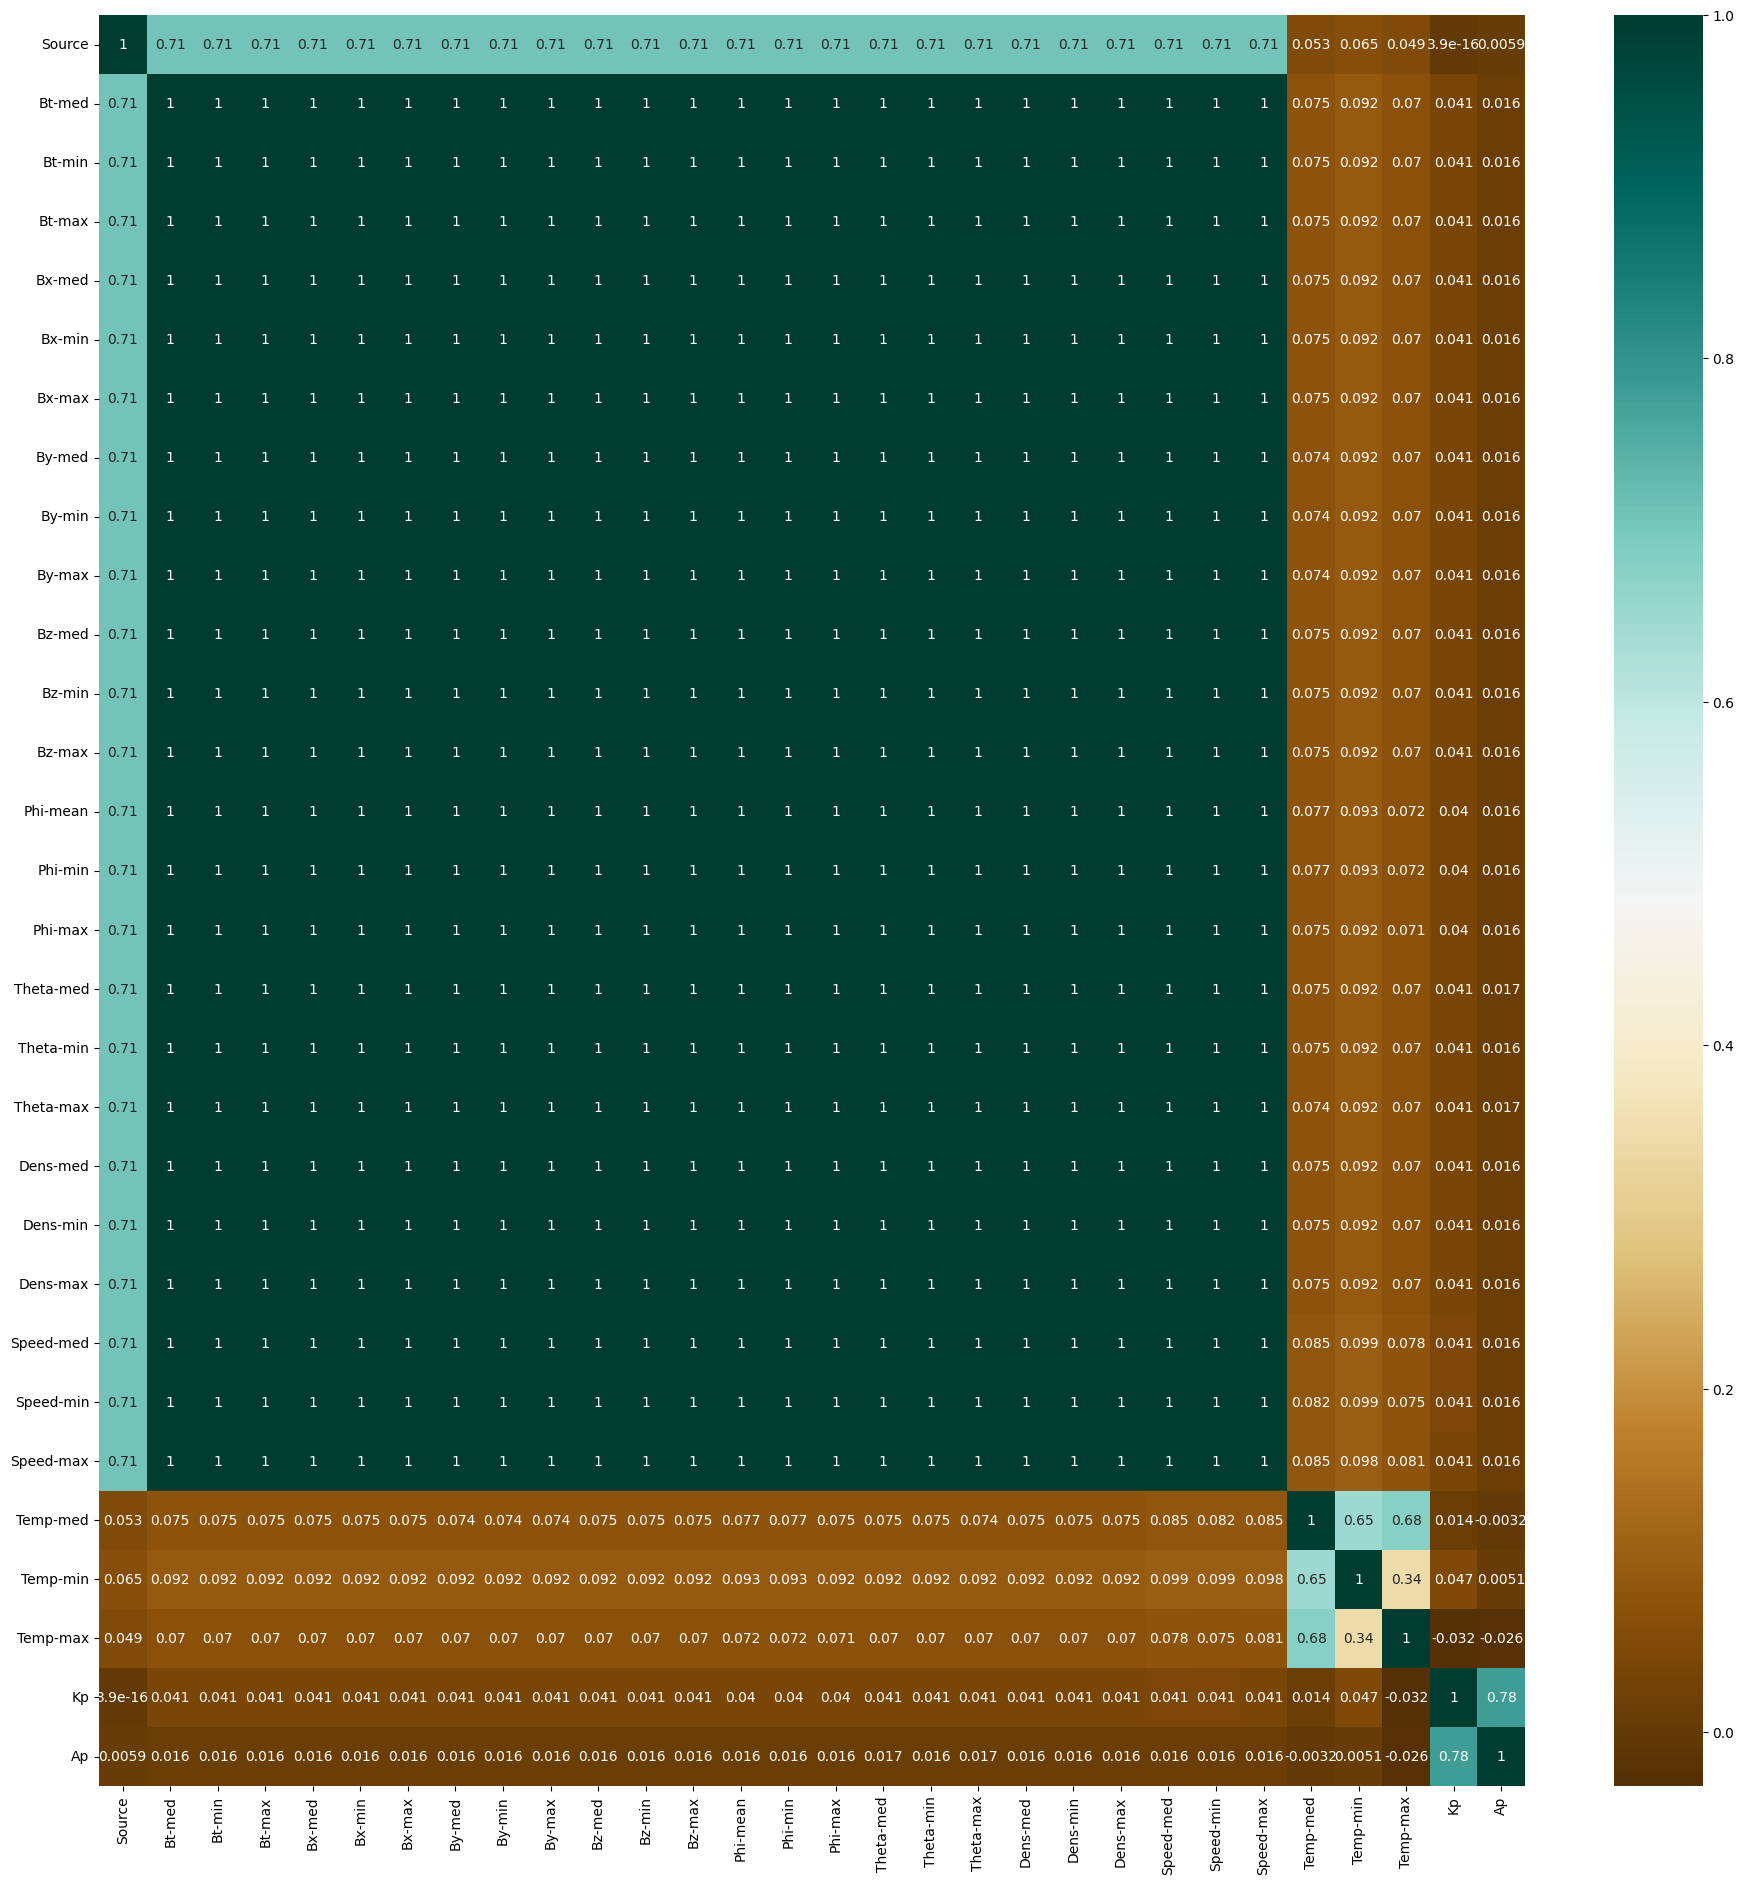

In [111]:
plt.figure(figsize=(23,23))
sns.heatmap(data.corr(),annot=True,cmap='BrBG')

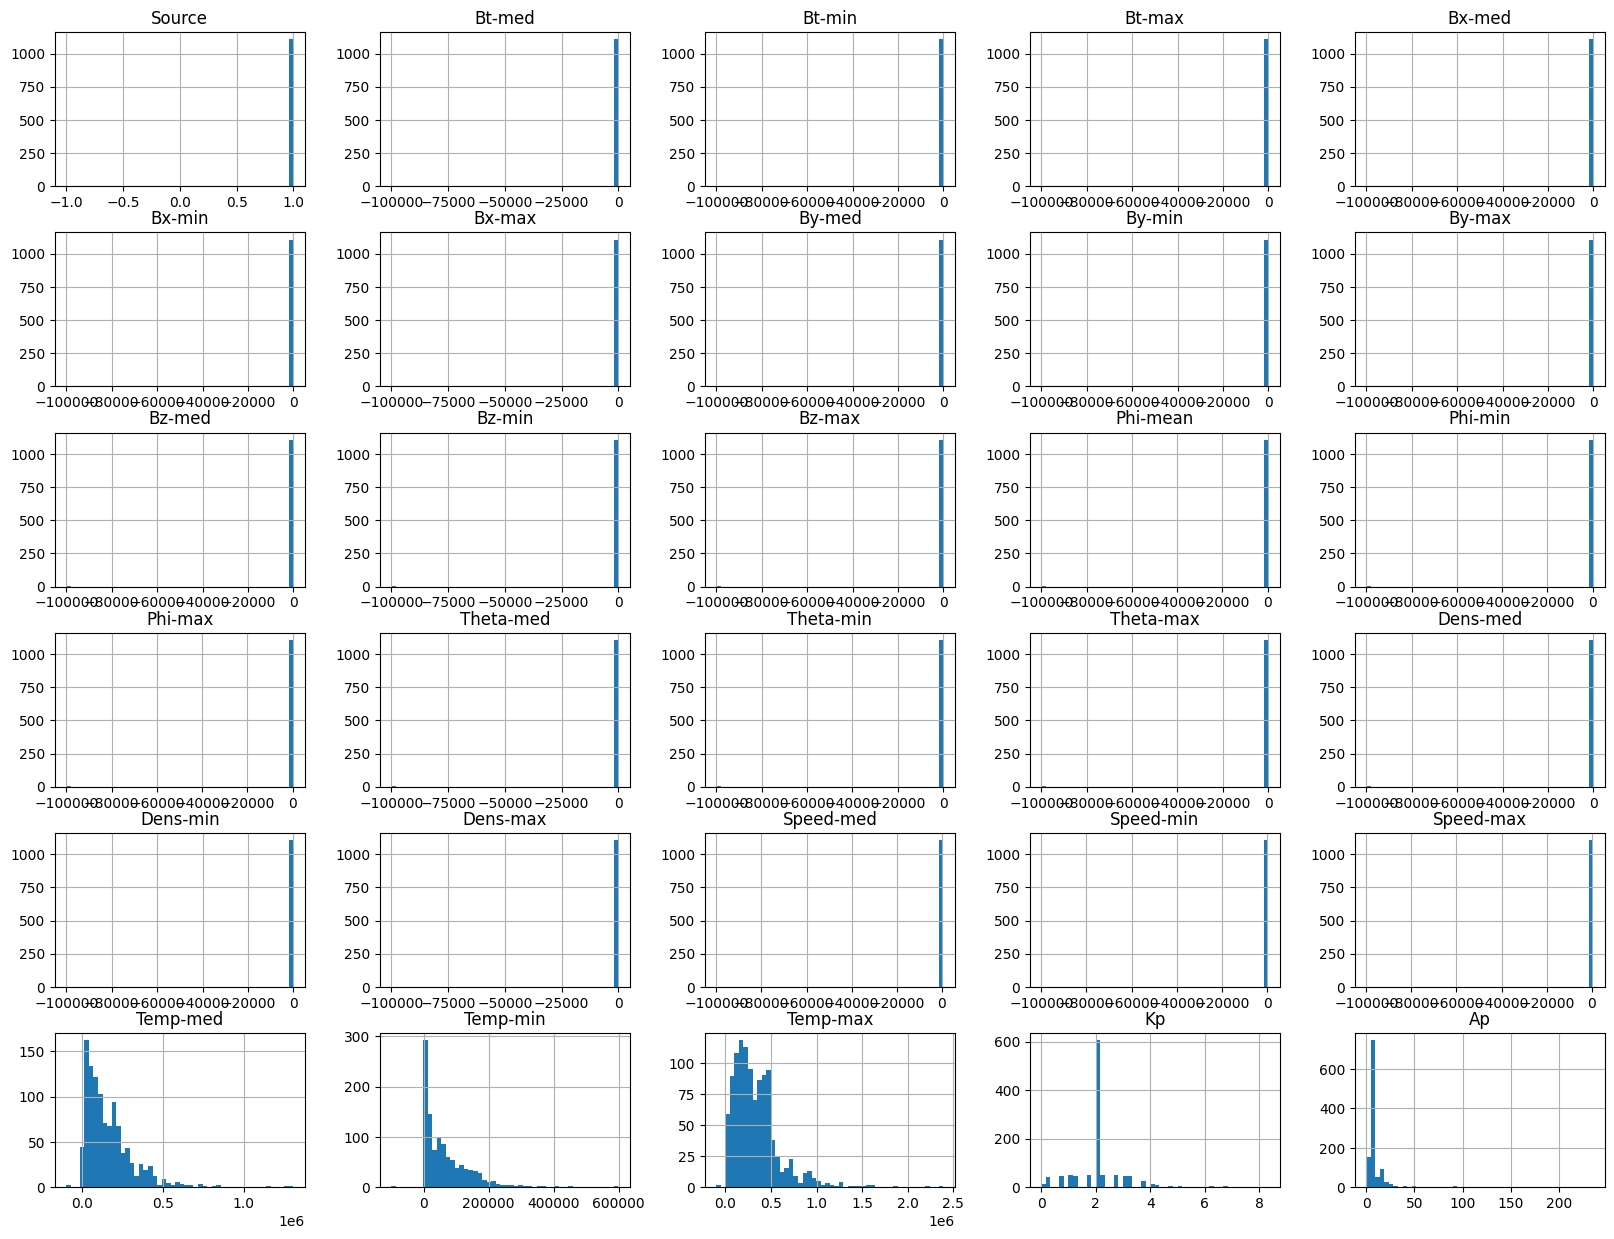

In [205]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [206]:
X = data.iloc[:,0:31]
y = data['Ap']
X.drop(['Timestamp'],axis=1,inplace=True)
X.drop(['Time'],axis=1,inplace=True)
X.shape

(1108, 29)

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [208]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(886, 29)
(886,)
(222, 29)
(222,)


In [215]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X) 
# Create ANN model
model = MLPRegressor(
    hidden_layer_sizes=(10, 30), 
    activation='relu',
    solver='adam', 
    alpha=1e-5,
    max_iter=1000)

model.fit(X_train, y_train)  
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print('R^2 score:', score)

# Save the trained model
filename = 'ann_model.sav'

R^2 score: -161.85427721552085


In [226]:
# Create the model
model = keras.models.Sequential([
    keras.layers.LSTM(64, return_sequences=True, input_shape=(886,29)),
    keras.layers.LSTM(64),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

# Compile and train the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(np.array(X_train).reshape(-1, 29, 1), np.array(y_train), epochs=30, 
                    validation_data=(np.array(X_test).reshape(-1, 29, 1), np.array(y_test)))

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 886, 64)           24064     
                                                                 
 lstm_18 (LSTM)              (None, 64)                33024     
                                                                 
 dense_49 (Dense)            (None, 10)                650       
                                                                 
Total params: 57,738
Trainable params: 57,738
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30


ValueError: in user code:

    File "c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_28" is incompatible with the layer: expected shape=(None, 886, 29), found shape=(None, 29, 1)
